### more pandas tips

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [24]:
#check correlation
corr = df['pclass'].corr(df['fare'])
corr

np.float64(-0.5494996199439082)

In [25]:
corr = df['age'].corr(df['fare'])
corr

np.float64(0.09606669176903894)

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
# axis 0 means row remove, axis=1 means entire colum remove
df.drop('deck', axis=1, inplace=True)

In [28]:
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [30]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [31]:
#fill only two missing values in emabarked column 
# by neighbouring values
df['embarked'].fillna(method='ffill', inplace=True)

C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\1697023447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(method='ffill', inplace=True)
C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\1697023447.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embarked'].fillna(method='ffill', inplace=True)


In [32]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [33]:
# fill embark_town
df['embark_town'].fillna(method='ffill', inplace=True)

C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\2198492007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(method='ffill', inplace=True)
C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\2198492007.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embark_town'].fillna(method='ffill', inplace=True)


In [34]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [35]:
df.age.min()

np.float64(0.42)

In [36]:
df['age'].min()

np.float64(0.42)

In [37]:
df.age.max()

np.float64(80.0)

<Axes: xlabel='age', ylabel='Count'>

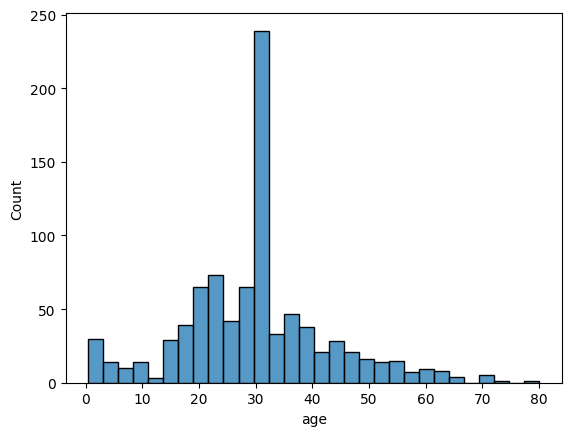

In [38]:
sns.histplot(df['age'], bins=30)

In [40]:
#distinct count agewise
print(df['age'].value_counts().sort_index())

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 89, dtype: int64


In [41]:
#  distinct df['age]
print(df['age'].nunique())

89


In [ ]:
# create bins of df['age'] 
df['age_bins'] = pd.cut(df['age'], bins=5, inp)
df['age_bins']


0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: age_bins, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [45]:
# binning age in 7 categories
bins=[0,1,5,15,18,30,50,80]
labels=['infant','toddler','kid','teen','young','adult','old']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_group']

0      young
1      adult
2      young
3      adult
4      adult
       ...  
886    young
887    young
888    young
889    young
890    adult
Name: age_group, Length: 891, dtype: category
Categories (7, object): ['infant' < 'toddler' < 'kid' < 'teen' < 'young' < 'adult' < 'old']

In [46]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_bins,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,"(16.336, 32.252]",young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,"(32.252, 48.168]",adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,"(16.336, 32.252]",young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,"(32.252, 48.168]",adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,"(32.252, 48.168]",adult


In [48]:
#drop column df.age_bins
df.drop('age_bins', axis=1, inplace=True)



In [49]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult


In [52]:
# calculate count of survived and not survived based on ag_group
df.groupby('age_group')[['survived','sex']].value_counts()


C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\2811836964.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')[['survived','sex']].value_counts()


age_group  survived  sex   
infant     1         male        8
                     female      4
           0         male        2
                     female      0
toddler    1         female     12
                     male        7
           0         male        6
                     female      5
kid        1         female     12
           0         male       11
                     female     10
           1         male        6
teen       0         male       28
           1         female     18
           0         female      7
           1         male        3
young      0         male      260
           1         female    104
                     male       44
           0         female     39
adult      0         male      120
           1         female     67
                     male       35
           0         female     19
old        0         male       41
           1         female     16
                     male        6
           0         female

C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\432316010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')[['survived', 'sex']].value_counts()
C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\432316010.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_counts = df.groupby(['age_group', 'sex'])['survived'].value_counts().unstack().fillna(0)


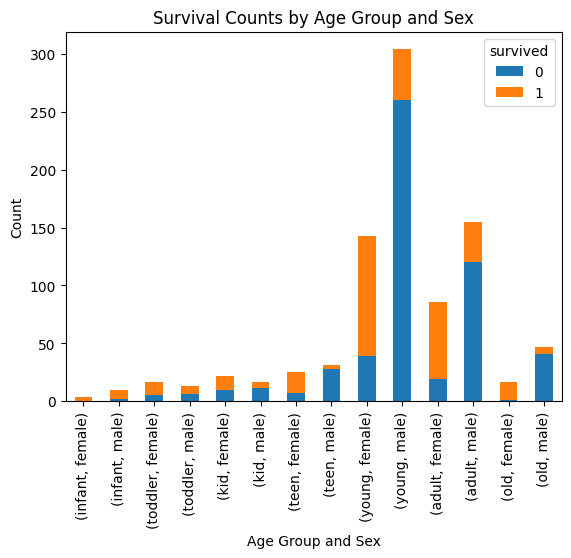

In [54]:
df.groupby('age_group')[['survived', 'sex']].value_counts()
survived_counts = df.groupby(['age_group', 'sex'])['survived'].value_counts().unstack().fillna(0)
survived_counts.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Age Group and Sex')
plt.xlabel('Age Group and Sex')
plt.ylabel('Count')
plt.show()

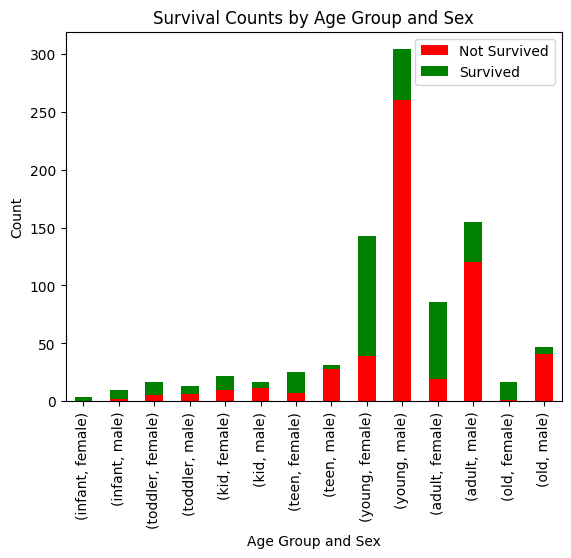

In [55]:
survived_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Age Group and Sex')
plt.xlabel('Age Group and Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [57]:
#calculate age group of passengers based on pclass
df.groupby('pclass')['age_group'].value_counts()

pclass  age_group
1       adult         86
        young         75
        old           39
        teen          10
        kid            3
        toddler        2
        infant         1
2       young         78
        adult         62
        old           15
        teen          10
        toddler        8
        kid            6
        infant         5
3       young        294
        adult         93
        teen          36
        kid           30
        toddler       20
        old           10
        infant         8
Name: count, dtype: int64

C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\106434571.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_age_group_counts = df.groupby(['pclass', 'age_group']).size().unstack().fillna(0)


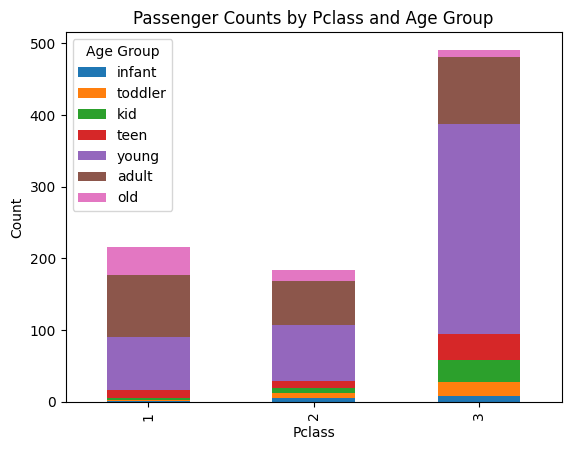

In [58]:
# Group by pclass and age_group and count the number of passengers
pclass_age_group_counts = df.groupby(['pclass', 'age_group']).size().unstack().fillna(0)

# Plot the data
pclass_age_group_counts.plot(kind='bar', stacked=True)
plt.title('Passenger Counts by Pclass and Age Group')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

In [59]:
age_group_counts_by_pclass = df.groupby(['pclass', 'age_group']).size().unstack().fillna(0)
print(age_group_counts_by_pclass)

age_group  infant  toddler  kid  teen  young  adult  old
pclass                                                  
1               1        2    3    10     75     86   39
2               5        8    6    10     78     62   15
3               8       20   30    36    294     93   10


C:\Users\qasim\AppData\Local\Temp\ipykernel_6628\3672612808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts_by_pclass = df.groupby(['pclass', 'age_group']).size().unstack().fillna(0)


In [61]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_group'],
      dtype='object')

In [65]:
df.columns.value_counts()

survived       1
pclass         1
sex            1
age            1
sibsp          1
parch          1
fare           1
embarked       1
class          1
who            1
adult_male     1
embark_town    1
alive          1
alone          1
age_group      1
Name: count, dtype: int64

In [66]:
df.columns.nunique()

15

In [67]:
df.columns.value_counts().sum()

np.int64(15)

In [60]:
# data filteration based on rows
df[(df['pclass']==1) & (df['age_group']=='adult')]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,Cherbourg,no,True,adult
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,Southampton,no,False,adult
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,Southampton,yes,False,adult
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,Southampton,yes,True,adult
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,Southampton,no,True,adult
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,Southampton,yes,False,adult


In [71]:
df[df['age_group']=='adult']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,Southampton,no,False,adult
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,Southampton,no,False,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,Southampton,no,True,adult
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,Southampton,no,True,adult
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,Southampton,no,True,adult
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,adult


In [72]:
df[df['age_group']=='adult']['pclass'].value_counts()

pclass
3    93
1    86
2    62
Name: count, dtype: int64

In [70]:
#filteration based on columns
df[['pclass', 'age_group']]

,pclass,age_group
0,3,young
1,1,adult
2,3,young
3,1,adult
4,3,adult
...,...,...
886,2,young
887,1,young
888,3,young
889,1,young


In [69]:
df[['pclass', 'age_group']].value_counts()

pclass  age_group
3       young        294
        adult         93
1       adult         86
2       young         78
1       young         75
2       adult         62
1       old           39
3       teen          36
        kid           30
        toddler       20
2       old           15
3       old           10
1       teen          10
2       teen          10
        toddler        8
3       infant         8
2       kid            6
        infant         5
1       kid            3
        toddler        2
        infant         1
Name: count, dtype: int64